In [ ]:
%matplotlib inline
import requests
import bs4
import numpy as np
import pandas as pd

### Lecture 10 - Part 1

# HTTP

## Outline
* HTTP requests: see [book](https://afraenkel.github.io/practical-data-science/07/requests.html) for details.
* Web Scraping and Crawling
* Parsing HTML

## Collecting Data

* Often the data you need doesn't exist in 'clean' csv files
* Solution: collect your own data!
    - Design your own experiment and collection (e.g. surveys, experiments).
    - Find related data on the Internet

## Data on the Internet

* The Internet contains *large* amounts of historical record:
    - archived record of events in the world (e.g. news stories)
    - human behaviors on the Internet (e.g. social network behaviors, commerce)
* Data for many natural experiments available for consumption

## How to collect data from the Internet

* Use a "data request endpoint" (i.e. published API: Application Programming Interface)
* Scrape and crawl content from web-pages.

Both communicate with content via HTTP requests!

## HTTP

* HyperText Transfer Protocol: is a *request-response* protocol 
* Allows one computer to talk to another over a network.
* Used to fetch data from servers hosting web-content ('web servers').
* Used to pass data over internal networks.

## Request-response model

HTTP follows the *request-response* (or client-server).

<div class="image-txt-container">
    
* The *request* is made by the client:
    * A computer web browser is the `client` to HTTP
    * "Client requests to view a video"
* The server returns a *response* to the request.
    * Youtube is a `server` that is sitting somewhere else.
    * "The content is served in a response"


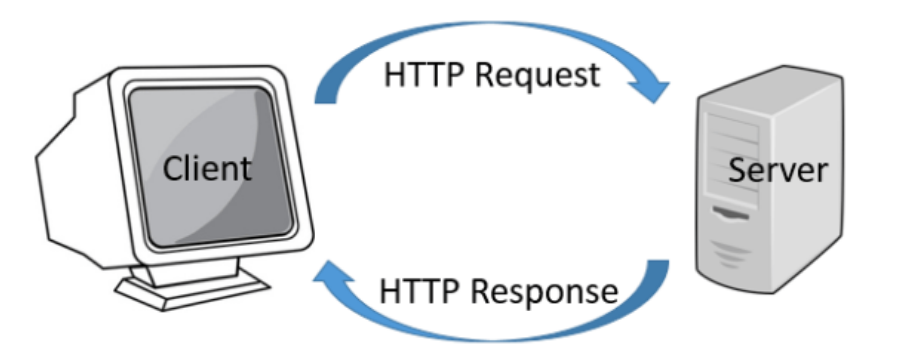

</div>

## Request-response model

When a request is sent to view content on a web-page:
* The server must process your request (prepare data for response)
* Send content from the the server to the client in its response.

This process requires computational resources for the server!

## A Request

```
GET /photos/cat.png HTTP/1.1
Host: www.catphotos.net
User-agent: Mozilla/4.0
Connection: close
Accept-language: en

data
```

## Request methods

* GET: is used to request data from a specified resource.

* HEAD: is almost identical to GET, but without the response body. HEAD requests are useful for checking what a GET request will return before actually making a GET request - like before downloading a large file or response body.

* DELETE: deletes the specified resource.

* POST: is used to send data to the server, for example, customer information, file upload, etc. using HTML forms.

* a few more

## A Response

```
HTTP/1.1 200 OK
Connection close
Date: Thu, 06 Aug 2021 12:00:15 GMT
Server: Apache/1.3.0 (Unix)
Last-Modified: Mon, 22 Jun 2021 ...
Content-Length: 682105
Content-Type: image/png

iVBORw0KGgoAAAANSUhEUgAAANwAAA ...
```

### Anecdote: Web-page hosting

* 15 year old makes a web-page that allows a user to:
    1. type in their name (client request)
    2. and receive a picture their (name's) spirit animal (server response).
* This requires a server-side 'look-up' of a picture for a given name.
* Hit Reddit front-page; $15,000 bill from cloud provider!


## Anecdote: Another Web-page hosting (2021)

<img src=./imgs/ship.png width=50%>

[Inside a viral website](https://notfunatparties.substack.com/p/inside-a-viral-website) - an account of what it's like to make a viral page with 50 million + views in 5 days.

### Anecdote: Web-page hosting

Moral: every time you view a page, it costs the page owner money!

* Be mindful of your impact when collecting data from the Internet.

### Part 2

# HTTP Requests

## Making HTTP requests

- from the command line, with `curl`
- from Python, with the `requests` package

## Making HTTP requests using `curl`

[`curl`](https://curl.haxx.se/docs/httpscripting.html) is a command-line tools that sends HTTP requests like a browser.

1. The client, curl, sends a HTTP request. 
2. The request contains a method (like GET, POST, HEAD etc)
3. The HTTP server responds with 
    - a status line (indicating if things went well), 
    - response headers 
    - a response body (usually) including the data.

### Example: GET

* `curl` by default issues a `GET`:

```
curl -v https://httpbin.org/html
# (`-v` is short for verbose)
```

* Now type the same URL in the browser

In [ ]:
!curl -v https://httpbin.org/html

### Example: POST

* a POST request with `curl` that sends 'Humpty Dumpty' as the parameter 'name'.
```
curl -d 'name=Humpty Dumpty' https://httpbin.org/post
# (`-d` is short for POST)
```

* You cannot send a POST directly in the url of a browser.


In [ ]:
!curl -d 'name=Humpty Dumpty' https://httpbin.org/post

## Sending Data in GET: URL-encoding

* GET can also send data to the server. 
* Data is appended to the URL with a special syntax: 
    * `?` begins a 'query'
    * `https://www.google.com/search?q=is+the+ship+still+stuck`
    * This method is good when you're sending small amounts of data. 
    * Also there might be cases you want parameters to be 'visible' in the URL (e.g. for crawlers)
* Understanding url-encoding helps structure your requests.

# Requests

* `requests` is a python package that allows you to use Python to interact with the Internet!  
* There are other packages (e.g. `urllib`), but `requests` is arguably the easiest to use.

In fact, to get the UCSD home page is a simple as
```
import requests
text = requests.get("https://ucsd.edu").text
```


In [ ]:
import requests

# GET request (default)
url = "https://ucsd.edu"
resp = requests.get(url)

In [ ]:
# response object
resp

In [ ]:
# body of response
print(type(resp.text))
print(len(resp.text))
resp.text[:1000]


In [ ]:
resp.request.url

In [ ]:
# post data with in a dictionary (json!)
post_response = requests.post("https://httpbin.org/post",
                              data={'name': 'Humpty Dumpty'})
post_response

In [ ]:
print(post_response.text)

# Status Codes

* When we request data from a website, the server responds with a HTTP status code.  
* The most common response is `200` which means things went well.  
* Other times you will get a different status code saying something else happened
    - you might be familiar with a `404` which means the page wasn't found.
* This great site lists http status codes: [https://httpstat.us/](https://httpstat.us/).
* But better yet, it has example sites that return a certain code, so you can test!  
    - So, for example, https://httpstat.us/404 returns a `404`

In [ ]:
r = requests.get("https://httpstat.us/404")
print(r.status_code)

In [ ]:
r.text

## Successful Requests

* You can check if the call went ok with `r.ok`, which returns a boolean.
* Unsuccessful requests can be 'retried' -- code this yourself!
    - If rate of requests is too high, slow down requests between each retry (`time.sleep`)
* For code examples, see the [book](https://afraenkel.github.io/practical-data-science/07/requests.html#designing-requests-code)



In [ ]:
statusCodes = [200, 404, 403, 429]

for statusCode in statusCodes:
    r = requests.get("https://httpstat.us/" + str(statusCode))
    print(str(statusCode) + " ok: " + str(r.ok))

In [ ]:
# Or raise an exception when there is a not-ok status code

r = requests.get("https://httpstat.us/404")
r.raise_for_status()

# The data formats of the Internet

Working with Internet communication, you will need to parse the data formats of the Internet.
* GET: response body is (usually) either JSON (APIs) or HTML (websites).
* POST: response body is usually JSON.

## JSON: JavaScript Object Notation

* Lightweight data-interchange format
* Used to send a data back and forth to a server as text
- Use cases:
    * Very easy for computers to read and write
    * OK for programmers to read and write by hand
    * It is mean to be *generated* and *parsed* (serialization/deserialization)
* Can be parsed/used with most modern languages
    - Natural Representation as a python dictionary/list
* JSON is slowly replacing XML (another text based format for sending the data to/from server)

## JSON: data types

* Number: There is no difference between ints and floats
* Strings: String of unicode characters, used in quotes
* Boolean: `true` and `false`
* Arrays: wrapped in []
* Objects: collection of key/value pairs (think: dictionaries)
* Null: Empty Value, denoted by `null`

# JSON: syntax rules

* Uses key/value pairs - {"name": "Donald"}
    * Uses double quotes for both key and value *strings*
    * keys must be strings
* Must follow the specific data types described above
* File extension is .json


# Simple Example

```
{
  "people": [
    {
      "name":"Donald",
      "age": 72
    },
    {
      "name":"Melania",
      "age":48
    },
    {
      "name":"Barack",
      "age":57
    },
    {
      "name":"Michelle",
      "age":55
    }
  ]
}
```

In [ ]:
s = '''
{
  "people": [
    {
      "name":"Donald",
      "age": 72
    },
    {
      "name":"Melania",
      "age":48
    },
    {
      "name":"Barack",
      "age":57
    },
    {
      "name":"Michelle",
      "age":55
    }
  ]
}
'''

In [ ]:
# read text to dictionary using the json library
import json
d = json.loads(s)
d

## JSON from the Internet

* JSON looks like a python dictionary. How is it different?
* Always use `json.loads` and ***never*** evaluate the text as a dictionary!
* You generally cannot trust the data you receive from HTTP requests.

```
{
    "people": shutil.rmtree('/all/my/important/files')
}
```

In [ ]:
# json stored as string
post_response.text

In [ ]:
# ALWAYS parse using json library
import json
json.loads(post_response.text)

In [ ]:
def delete_all_files():
    print('I wish to inform you that all of your files have been deleted.')
    print('Have a good day.')
    # shutil.rmtree('/all/of/your/files')

In [ ]:
malicious = open('data/response.json').read()

In [ ]:
# print the text of the malicious request
print(malicious)

In [ ]:
# Eval it to a dictionary (BAD, DON'T DO THIS)
eval(malicious)

In [ ]:
# Parse with JSON library (GOOD)
json.loads(malicious)

### Handling 'unfamiliar' data
* Never trust data from an unfamiliar site
* **Never** use eval on 'raw' data that you didn't create!
* The json data format needs to be *parsed*, not evaluated as a dictionary.
    - It was designed with safety in mind!

### Part 3

# Getting Data From the Internet

## Programmatic requests

* We learned how to use python `requests` to exchange data via HTTP.
* There are two ways of collecting data with requests:
    * Use a published API (Application Programming Interface)
    * 'Screen Scrape' a page to collect raw HTML as in a browser


### Public APIs

* An API is URL making data directly available to the user
* Advantages:
    - The data is usually clean, up-to-date, and ready to use.
    - Presence of a API means the data provider is *ok* with you to use it.
    - The data-owner can plan and regulate data usage.
* Disadvantages:
    - APIs don't always exist for the data you want!

### Screen Scraping

* Programmatically 'browsing' the web, downloading the source HTML of each page.
* Advantages:
    * Can always do it!
* Disadvantages:
    * Difficult to parse and clean the data
    * Hard to automate on changing webpages
    * Not always wanted; not always legal!
- In general, prefer APIs.

## Why Scraping?

* Not all scraping is unethical!
* Google scrapes pages to make them searchable
* Making an API takes work -- scraping may be the only way!

How do you scrape ethically and responsibly?

### Best practices for scraping

1. **Send requests slowly**; be upfront about what you are doing!
2. Respect the policy published in the page's `robots.txt` file
3. Don't spoof your UserAgent (or try to trick the server into thinking you are a person)
4. Read the Terms of Service for the site and follow it.

### Consequences of irresponsible scraping

* Too many requests may cause the server will block your IP Address!
    - Everyone in your dorm might lose access to Google! (Seriously!)
    - Bad enough? May bring legal trouble!
* Too many requests may take down the website
    - A scraper (journalist) took down the Cook County Inmate Locater
    - Ethical implication: inmate's families couldn't contact them while the site was down.

## `Robots.txt`

* Many sites have a published policy allowing or disallowing automatic access to their site.  
* This policy is in a text file `robots.txt`: learn more about it [here](https://moz.com/learn/seo/robotstxt).
* Remember the best practices above - just because you aren't prohibited by the robots policy doesn't mean you can scrape the site!

Check the following sites:
* https://slate.com/comments/
* https://datascience.ucsd.edu

## Getting the HTML

* GET requests result in HTML; What does this look like?
* Let's see what is on the UCSD Data Science Events page.

In [ ]:
url = "http://dsc.ucsd.edu/node/10"

r = requests.get(url)
    
urlText = r.text

Nchars = 10000
print(urlText[:Nchars]) # Print the first 500 characters
print("\n\n... " + str(len(urlText)-Nchars) + " additional characters")


In [ ]:
len(r.text)

Wow, that is gross looking!  It is **raw** HTML, which the browser uses to make the viewable site.

## What is an API?

* APIs are url endpoints dedicated for programmatic requests setup by the website host.

* **An endpoint** is a server route that is used to retrieve different data from the API. 

For example, on the Reddit API:
* the `/comments` endpoint retrieves information about comments, 
* the `/users` endpoint might retrieve data about users. 

To access them, you would add the endpoint to the base url of the API.

## Why APIs are *always* better

* The data is changing quickly. 
    - E.g. stock price data: don't want to scrape a page every few minutes!
* You want a small piece of a much larger set of data. 
    - What if you want to just pull your own comments on Reddit? (all is too much)
    - What if you want your Google GPS history? (private)
* You want usability and stability, not changing HTML requiring translation.
    - Websites change *all the time!*

## API requests

* API requests are just GET/POST requests to a specially maintained URL.

In [ ]:
# Make a get request 
response = requests.get("https://pokeapi.co/api/v2/pokemon/squirtle")

# Print the status code of the response. Are we in trouble?
print(response.status_code)

In [ ]:
# Make a get request 
response = requests.get("https://pokeapi.co/api/v2/pokemon/justin")

# Print the status code of the response. and now?
print(response.status_code)

In [ ]:
# Make a get request 
response = requests.get("https://pokeapi.co/api/v2/pokemon/squirtle")

# Print the status code of the response. and now??
# print(response.status_code)
# print(response.content)

print(json.loads(response.content))

## APIs vs Scraping

- APIs allow for authentication (and access to sensitive data).
- APIs have more reliable data that is easier to parse.
- APIs allow hosts to monitor usage and protect their website


## APIs vs Scraping
    
* Scraping mimics the browser and is uncontrolled like normal browsing.
    - Many rapid requests to a small site can take down the host server.
    - Many rapid requests to a small site can cost the owner money
    - Always be respectful and responsible when scraping!